In [44]:
from serpapi import GoogleSearch
from tqdm import tqdm 
import re 
import pandas as pd 
import matplotlib.pyplot as plt 

In [1]:
params = {
  "api_key": "2fad1670a65d5451fbb03128335200a29f7d445ebfa4acbb82a7f4d5cbbdef19",
  "engine": "google_scholar",
  "q": "punishment in public goods experiments",
  "hl": "en",
  "num": "2000"
}

search = GoogleSearch(params)
results = search.get_dict()

https://serpapi.com/search


In [18]:
%%capture
all_results = []

for i in tqdm(range(50)):
    params = {
      "api_key": "2fad1670a65d5451fbb03128335200a29f7d445ebfa4acbb82a7f4d5cbbdef19",
      "engine": "google_scholar",
      "q": "punishment in  public goods experiments",
      "hl": "en",
      "num": "20",
       "start":f"{20*i}" 
    }

    search = GoogleSearch(params)
    results = search.get_dict()
    all_results += results["organic_results"]

KeyError: 'organic_results'

In [38]:
paper_dicts = []

for paper in tqdm(all_results):
    try:
        title = paper['title']
    except: 
        title = None
    try:    
        authors = [author['name'] for author in paper['publication_info']['authors']]
    except: 
        authors = None
    try:
        num_citations = paper['inline_links']['cited_by']['total']
    except: 
        num_citations = None 
    try:
        year = re.findall("([0-9][0-9][0-9][0-9])", paper['publication_info']['summary'])[0]
    except:
        year = None 
        
    paper_dicts.append({'title':title,
                        'authors':authors,
                        'num_citations':num_citations,
                        'year':year})

100%|██████████| 980/980 [00:00<00:00, 180972.04it/s]


In [69]:
df_pgg_papers = pd.DataFrame(paper_dicts).dropna(subset=["year"]).assign(year = lambda x: x['year'].astype(int))
df_pgg_papers.to_pickle("pgg_papers.pkl")

In [75]:
for row in df_pgg_papers.query("year > 1990").sort_values("year").itertuples():
    print(f"{row.year} {row.authors}: {row.title}")

1991 ['J Sell', 'RK Wilson']: Levels of information and contributions to public goods
1992 ['J Alm', 'GH McClelland', 'WD Schulze']: Why do people pay taxes?
1993 ['K Hawkes', 'J Altman', 'S Beckerman']: Why hunter-gatherers work: An ancient version of the problem of public goods
1994 None: The predictive ability of social values in resource dilemmas and public goods games
1995 ['J Alm']: Economic and noneconomic factors in tax compliance
1996 ['J Sonnemans', 'A Schram']: Value orientations, expectations and voluntary contributions in public goods
1997 ['J Sell']: Gender, strategies, and contributions to public goods
1997 ['S Bowles', 'R Boyd', 'E Fehr', 'H Gintis']: Homo reciprocans: A research initiative on the origins, dimensions, and policy implications of reciprocal fairness
1998 ['CB Cadsby']: Gender and free riding in a threshold public goods game: Experimental evidence
1998 ['RM Isaac', 'JM Walker']: Nash as an organizing principle in the voluntary provision of public goods: Ex

In [53]:
df_timeline = df_pgg_papers.groupby("year").size().reset_index()
df_timeline['year'] = df_timeline['year'].astype(int)
df_timeline = df_timeline.query("year > 1800 and year < 2023")

In [54]:
df_timeline

,year,0
6,1980,2
7,1984,1
8,1986,1
9,1988,1
10,1990,1
11,1991,1
12,1992,1
13,1993,1
14,1994,1
15,1995,1


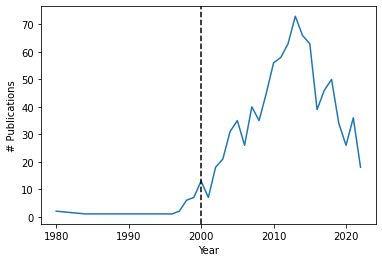

In [58]:
plt.plot(df_timeline['year'], df_timeline[0])
plt.xlabel("Year")
plt.ylabel("# Publications")
plt.axvline(x=2000, color="black", linestyle="--")

In [60]:
df_pgg_papers.sort_values("year").query("year > 1990")

TypeError: '>' not supported between instances of 'str' and 'int'